In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
# https://github.com/matplotlib/ipympl
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d


In [2]:
def sphere_to_cart(r, phi, theta):
    # phi is the polar (0 to 2pi) angle, theta is azimuthal (0 to pi) angle
    x = r * np.cos(phi)*np.sin(theta)
    y = r * np.sin(phi)*np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z

def get_cone(theta, max_r=1., n_phi=20, n_r = 10):
    # fix theta, vary phi and r and you get a cone
    phi, r = np.meshgrid(np.linspace(0,2*np.pi, n_phi), np.linspace(0, max_r, n_r))
    return sphere_to_cart(r, phi, theta)

def get_sphere(r, n_phi=20, n_theta=10):
    # fix r and vary phi, theta and you get a sphere
    phi, theta = np.meshgrid(np.linspace(0,2*np.pi, n_phi), np.linspace(0, np.pi, n_theta))
    return sphere_to_cart(r, phi, theta)

def get_plane(phi, x_max = 1, z_max = 1, n_x = 10, n_z = 10, y_cutoff = 5):
    # fix phi and you get a plane parallel to the z axis
    
    # z will be any value, so pick z and x then calculate y  
    z, x = np.meshgrid(np.linspace(-x_max, x_max, n_x), np.linspace(-z_max, z_max, n_z))    
    if np.abs(phi - np.pi/2) > 1e-4:        
        y = x * np.tan(phi)
    else:
        # tan(pi/2) is undefined: at this limit, we have a plane normal to z and y axes, 
        # so y can be anything, so just set to our x value:
        y = x
            
    return x, y, z
    

Pick 2 values each for r, theta, phi. Permuting the values results in 8 vertices in spherical coordinates. 

In [3]:
theta_1 = 20 * np.pi/180
theta_2 = 45 * np.pi/180
r_1 = 1.
r_2 = 2. 
phi_1 = 10 * np.pi/180
phi_2 = 75 * np.pi/180

get the basic geometic shapes for each of these fixed values:

In [4]:
cone = get_cone(theta_1, max_r = 2)
cone2 = get_cone(theta_2, max_r = 2)
sp = get_sphere(r_1)
sp2 = get_sphere(r_2, n_phi=30, n_theta=25)
plane = get_plane(phi_1, x_max = 2, z_max=2)
plane2 = get_plane(phi_2, x_max = 2, z_max=2)

and get the cartesian coords of our vertices

In [5]:
points = [sphere_to_cart(r_1, phi_1, theta_1,),
          sphere_to_cart(r_2, phi_1, theta_1),
          sphere_to_cart(r_2, phi_1, theta_2),
          sphere_to_cart(r_1, phi_1, theta_2),
          sphere_to_cart(r_1, phi_2, theta_1),
          sphere_to_cart(r_2, phi_2, theta_1),
          sphere_to_cart(r_2, phi_2, theta_2),
          sphere_to_cart(r_1, phi_2, theta_2),]
points = np.array(points)

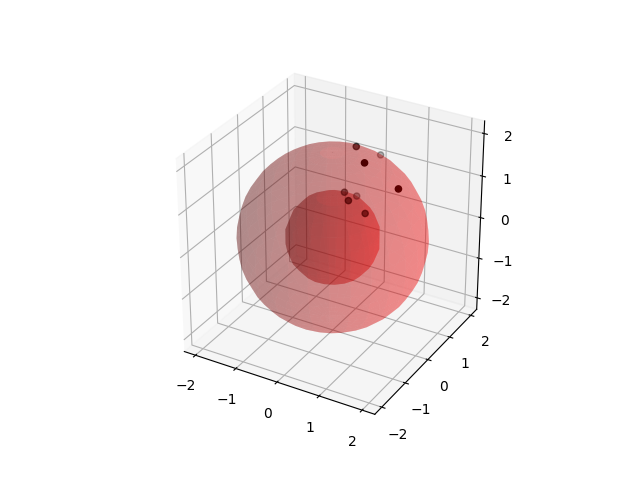

In [6]:
# fixed r: points on 2 spheres
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])
ax.scatter(points[:,0], points[:,1], points[:,2], color=(0., 0., .0, 1.))
ax.plot_surface(*sp, color=(1., 0, 0, 0.25))
ax.plot_surface(*sp2, color=(1., 0, 0, 0.25))
plt.show()

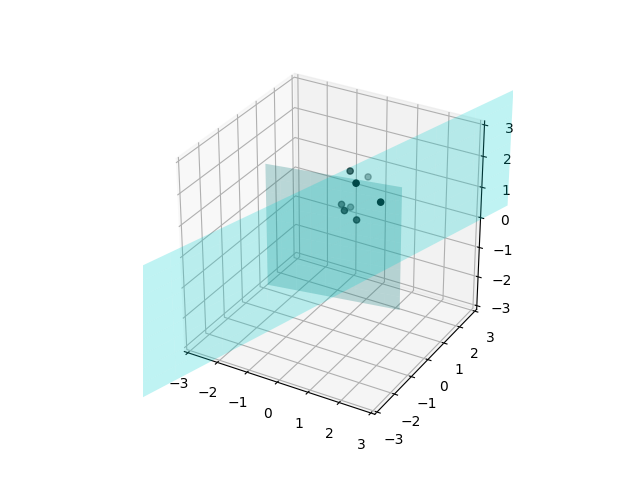

In [7]:
# fixed phi: points lie on 2 planes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])
ax.scatter(points[:,0], points[:,1], points[:,2], color=(0., 0., .0, 1.))
ax.plot_surface(*plane, color=(0., 1., 1.0, 0.25))
ax.plot_surface(*plane2, color=(0., 1., 1.0, 0.25))
ax.axes.set_xlim3d(left=-3, right=3) 
ax.axes.set_ylim3d(bottom=-3, top=3) 
ax.axes.set_zlim3d(bottom=-3, top=3)
plt.show()

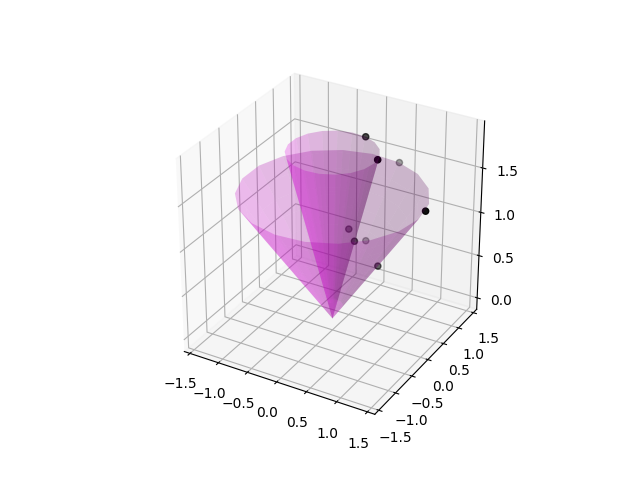

In [8]:
# fixed theta, points lie on 2 cones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])
ax.scatter(points[:,0], points[:,1], points[:,2], color=(0., 0., .0, 1.))
ax.plot_surface(*cone, color=(1., 0, 1.0, 0.25))
ax.plot_surface(*cone2, color=(1., 0, 1.0, 0.25))
plt.show()

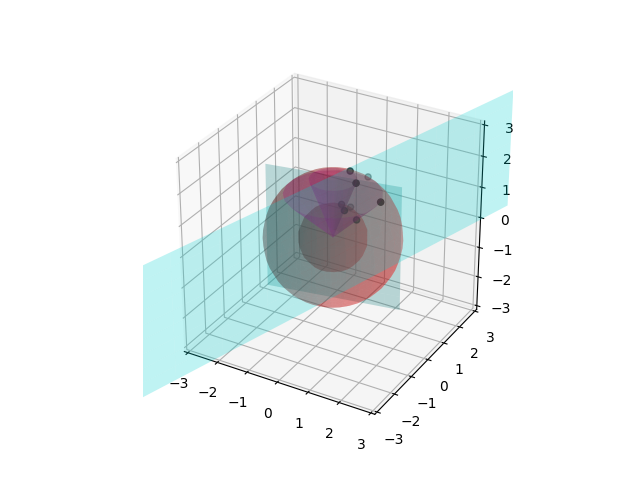

In [9]:
# the volume enclosed by these 6 curves is our spherical sub-volume: 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])


ax.plot_surface(*cone, color=(1., 0, 1.0, 0.25))
ax.plot_surface(*cone2, color=(1., 0, 1.0, 0.25))
ax.plot_surface(*sp, color=(1., 0, 0, 0.25))
ax.plot_surface(*sp2, color=(1., 0, 0, 0.25))
ax.plot_surface(*plane, color=(0., 1., 1.0, 0.25))
ax.plot_surface(*plane2, color=(0., 1., 1.0, 0.25))
ax.scatter(points[:,0], points[:,1], points[:,2], color=(0., 0., .0, 1.))
ax.axes.set_xlim3d(left=-3, right=3) 
ax.axes.set_ylim3d(bottom=-3, top=3) 
ax.axes.set_zlim3d(bottom=-3, top=3)
plt.show()


given an arbitrary ray: 

$\bar{r} = \bar{r_o} + \bar{u} t$, 

given spherical coordinates of our subvolume's vertices.

for shape in (outer_sphere, inner_sphere, cone_1, cone_2, plane_1, plane_2):

    find intersection points, t_i(x,y,z), if they exist
    calculate spherical coords of t_i, discard any outside volume of interest 
    
If the ray intersects the volume, can have:

* 1 intersection (cusp of outer sphere or cusp of outer cone)
* 4 intersections (2 inner cone, 1 on each plane)
* 3 intersections (inner cone cusp, 1 on each plane)
* 2 intersections, normal: any combo of the faces)
* 2 intersections, weird: if the ray passes through the inner vertices exactly, will hit the verts without traveling through the volume. Probably just discard in that case.... 

Special considerations:

* It's possible that shapes will have the same intersection points, above numbers are **unique** intersections. 
* If the ray is parallel to and within one of the planes, there will be infinite intersections in the plane. But there will also **always** be intersections with the other faces. So just discard the planes if the ray is parallel and we'll be left with the entry/exit points on the other geometries. 
* Check the outer sphere first: discard if no intersection (cannot intersect the volume without intersecting the outer sphere)

    
On the intersections:

ray + plane: 0, 1 or infinite solutions for t
ray + sphere: quadradtic solution, 0, 1 (cusp) or 2 solutions for t
ray + cone:  quadradtic solution, 0, 1 (cusp) or 2 solutions for t
